# ism3d.arts: model artificial sources in different shapes

## Setup

We first import essential API functions / modules from `ism3d` and other libraries

**Used ISM3D Functions:**

* `im3d.logger.logger_config`
* `im3d.logger.logger_status`

In [3]:
nb_dir=_dh[0]
os.chdir(nb_dir+'/../output/mockup')
sys.path.append(nb_dir)
from notebook_setup import *

%matplotlib inline
#%config InlineBackend.figure_format = "png" #  ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%reload_ext wurlitzer
%reload_ext memory_profiler
%reload_ext line_profiler

#ism3d.logger_config(logfile='ism3d.log',loglevel='INFO',logfilelevel='INFO',log2term=False)
ism3d.logger_config(logfile='ism3d.log',loglevel='DEBUG',logfilelevel='DEBUG',log2term=False)

print(''+ism3d.__version__)
print('working dir: {}\n'.format(os.getcwd()))

0.3.dev1
working dir: /Users/Rui/Resilio/Workspace/projects/ism3d/models/output/mockup



## Model Configuration / Initialization / Rendering

We read the model configuration from a parameter file following [the INI file format](https://en.wikipedia.org/wiki/INI_file)).
Then we render it into a specifield WCS system for visulization purposes.

**Used ISM3D Functions:**

* `ism3d.utils.meta.create_header`
* `ism3d.interface.read_inp`
* `ism3d.interface.inp_to_mod`
* `ism3d.modeling.model.model_realize`
* `ism3d.simxy.render.render_apmodel2d`

<Figure size 432x288 with 0 Axes>

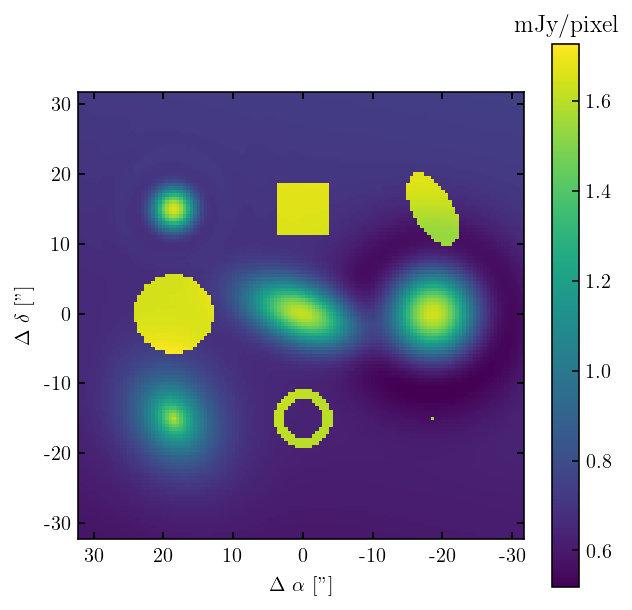

In [5]:
header=create_header(naxis=[128,128,120],
                     objname='arts.models',
                     crval=[189.2933333,62.3711111,45535299115.90349],
                     cdelt=[-0.5/3600,0.5/3600,2000013.13785553])

inpfile='../../input/mockup_apmodels.ini'
inp_dict=read_inp(inpfile)
mod_dict=inp_to_mod(inp_dict)
model_name='mockup5'

from ism3d.simxy.render import render_apmodel2d as xy_render_apmodel2d
out=0
for obj in mod_dict:
    plane,fluxscale=xy_render_apmodel2d(mod_dict[obj],WCS(header),normalize=False)
    #print(obj,mod_dict[obj]['sbProf'],plane.sum(),np.max(plane),fluxscale[0].value)
    out=out+plane*fluxscale[0].value

fits.writeto('mockup_arts.fits',out,header,overwrite=True)
im_grid(out*1e3,header,offset=True,units=['mJy/pixel'],
        titles=None,nxy=(1,1),figsize=(5,5),
        figname='mockup_arts.pdf',showplot=True)